In [25]:
# Author: Dýrmundur Helgi R. Óskarsson
# Date: 15.9.2023
# Project: 4 Linear Regression
# Acknowledgements: Einar Óskar og Torfi Tímóteus
#

# NOTE: Your code should NOT contain any main functions or code that is executed
# automatically.  We ONLY want the functions as stated in the README.md.
# Make sure to comment out or remove all unnecessary code before submitting.

import numpy as np
import matplotlib.pyplot as plt

from tools import load_regression_iris
from scipy.stats import multivariate_normal

[[0.00081185 0.00100599 0.00119015 ... 0.00137739 0.00123433 0.00105608]
 [0.00095701 0.0011535  0.00132743 ... 0.0013378  0.00116613 0.00097051]
 [0.00099061 0.00118896 0.00136247 ... 0.00134443 0.00116697 0.00096711]
 ...
 [0.00022494 0.00033425 0.00047422 ... 0.00136119 0.00146281 0.0015009 ]
 [0.00022415 0.00033669 0.00048286 ... 0.00146273 0.00158896 0.001648  ]
 [0.00031179 0.00045031 0.00062097 ... 0.00154612 0.00161495 0.00161053]]


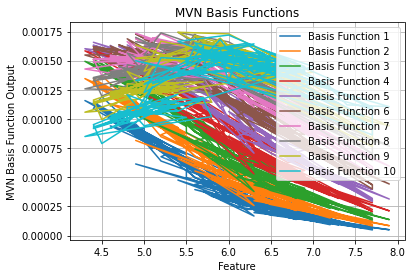

In [49]:
# Part 1.1

def mvn_basis(
    features: np.ndarray,
    mu: np.ndarray,
    sigma: float
) -> np.ndarray:
    '''
    Multivariate Normal Basis Function
    The function transforms (possibly many) data vectors <features>
    to an output basis function output <fi>
    Inputs:
    * features: [NxD] is a data matrix with N D-dimensional
    data vectors.
    * mu: [MxD] matrix of M D-dimensional mean vectors defining
    the multivariate normal distributions.
    * sigma: All normal distributions are isotropic with sigma*I covariance
    matrices (where I is the MxM identity matrix)
    Output:
    * fi - [NxM] is the basis function vectors containing a basis function
    output fi for each data vector x in features
    '''
    N, D = features.shape
    M = mu.shape[0]
    
    fi = np.zeros((N, M))
    
    for i in range(N):
        for j in range(M):
            mvn = multivariate_normal(mu[j], sigma * np.eye(D))
            fi[i, j] = mvn.pdf(features[i])
    
    return fi

#X, t = load_regression_iris()
#N, D = X.shape

#M, sigma = 10, 10
#mu = np.zeros((M, D))
#for i in range(D):
#    mmin = np.min(X[i, :])
#    mmax = np.max(X[i, :])
#    mu[:, i] = np.linspace(mmin, mmax, M)
#fi = mvn_basis(X, mu, sigma)
#print(fi)


# Part 1.2

def _plot_mvn():
    for j in range(mu.shape[0]):
        plt.plot(X[:, 0], fi[:, j], label=f'Basis Function {j+1}')
    
    plt.xlabel('Feature')
    plt.ylabel('MVN Basis Function Output')
    plt.legend()
    plt.title('MVN Basis Functions')
    plt.grid(True)
    plt.savefig("plot_1_2_1.png")
    plt.show()
    
#_plot_mvn()

In [50]:
# Part 1.3

def max_likelihood_linreg(
    fi: np.ndarray,
    targets: np.ndarray,
    lamda: float
) -> np.ndarray:
    '''
    Estimate the maximum likelihood values for the linear model

    Inputs :
    * Fi: [NxM] is the array of basis function vectors
    * t: [Nx1] is the target value for each input in Fi
    * lamda: The regularization constant

    Output: [Mx1], the maximum likelihood estimate of w for the linear model
    '''
    N, M = fi.shape
    I = np.eye(M)
    
    w = np.dot(np.linalg.inv(np.dot(fi.T, fi) + lamda * I), np.dot(fi.T, targets))
    
    return w

#fi = mvn_basis(X, mu, sigma)
#lamda = 0.001
#wml = max_likelihood_linreg(fi, t, lamda)
#print(wml)

[  3.04661879   8.98364452  17.87352659  29.86144389  44.59162487
  61.12887842  78.01047234  93.44289728 105.61212037 113.03406275]


In [51]:
# Part 1.4

def linear_model(
    features: np.ndarray,
    mu: np.ndarray,
    sigma: float,
    w: np.ndarray
) -> np.ndarray:
    '''
    Inputs:
    * features: [NxD] is a data matrix with N D-dimensional data vectors.
    * mu: [MxD] matrix of M D dimensional mean vectors defining the
    multivariate normal distributions.
    * sigma: All normal distributions are isotropic with s*I covariance
    matrices (where I is the MxM identity matrix).
    * w: [Mx1] the weights, e.g. the output from the max_likelihood_linreg
    function.

    Output: [Nx1] The prediction for each data vector in features
    '''
    N, D = features.shape
    M = mu.shape[0]
    fi = np.zeros((N, M))
    
    for i in range(N):
        for j in range(M):
            mvn = multivariate_normal(mu[j], sigma * np.eye(D))
            fi[i, j] = mvn.pdf(features[i])
    
    predictions = np.dot(fi, w)
    
    return predictions

#wml = max_likelihood_linreg(fi, t, lamda)
#prediction = linear_model(X, mu, sigma, wml)
#print(prediction)

[0.72174704 0.71462572 0.72048698 0.75382486 0.73161981 0.7494642
 0.7502493  0.74274217 0.73390818 0.73639504 0.71611075 0.77254612
 0.7209857  0.69245036 0.62815198 0.68025165 0.68489838 0.72174704
 0.71663498 0.74354413 0.73937946 0.74246066 0.68445254 0.76266757
 0.81905846 0.73908547 0.75888289 0.72996351 0.71058506 0.7699145
 0.75875142 0.7085666  0.73459259 0.68944057 0.73639504 0.68496171
 0.66987727 0.73851694 0.72347508 0.73507154 0.71238127 0.66537777
 0.73359164 0.76212739 0.80673131 0.7209857  0.75993449 0.742373
 0.72546386 0.72258096 0.64218828 0.75221845 0.6420997  0.79922226
 0.69979749 0.81849027 0.76443033 0.86070916 0.69252603 0.88090942
 0.80208454 0.82283223 0.72466442 0.76362966 0.85596573 0.69926306
 0.84974263 0.80961119 0.68339645 0.81449032 0.8091737  0.77925634
 0.68240043 0.75428537 0.73614426 0.70864637 0.64149325 0.66117807
 0.78863407 0.81019399 0.8139058  0.81351774 0.81212522 0.72839088
 0.87218568 0.82622054 0.68660178 0.68559925 0.8646522  0.82496554

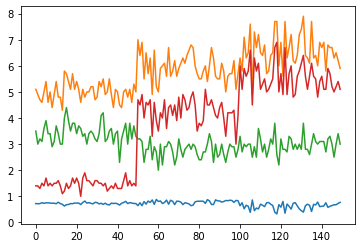

In [52]:
#plt.plot(prediction)
#plt.plot(X)
#plt.show()